# **Análisis base de datos Prices_melbourng**


El presente Notebook es un analisis resultante de la base de Prices_melbourng 

##### *Wilmar Murillo Carmona*

## **Contenido**
   

- <a href="#imp">Importación de librerias para el analisis</a><br>
- <a href="#mot">Importación de datos </a><br>
- <a href="#visual">Visualización de la importación de los datos y sus tipos de variables</a><br>
- <a href="#norm">Normalización de datos </a><br>
   - <a href="#var">Variables categoricas</a><br>
   - <a href="#ope">Variables float</a><br>
- <a href="#Trat">Tratamiento de datos nulos</a><br>
   - <a href="#var">Car</a><br>
   - <a href="#ope">Building_Area</a><br>
   - <a href="#var">Year_Built</a><br>
   - <a href="#var">Council_Area</a><br>
- <a href="#transf">Correlación Variables</a><br>      
   - <a href="#ope">Correlaciones Positivas</a><br>
   - <a href="#ope">Correlaciones Negativos</a><br>
- <a href="#selmod">Model ML</a><br>
    - <a href="#ope">Decisiontree_model</a><br>

 


<p><a name="imp"></a></p>

# Importación de librerias para análisis y visualización de datos 

In [1]:
#Librerias 

import pandas as pd  # Analisis de datos
import numpy as np  # Arreglos matrices 
import matplotlib.pyplot as plt # Visualización de datos 
import seaborn as sns # Visualización de datos
%matplotlib inline

<p><a name="impt"></a></p>

# Importación de datos  

In [2]:
url = "/kaggle/input/melbourne-housing-snapshot/melb_data.csv"
df = pd.read_csv(url)

<p><a name="visual"></a></p>

# visualización de la importación de los datos y sus tipos de variables 

In [3]:
#Visualizar datos importados 
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


#### Verificación de datos nulos, columnas y tipos de variables

In [4]:
df.info()

print("_"*40)

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

(13580, 21)

<p><a name="norm"></a></p>

# Normalización de datos 

In [5]:
# Renombrar nombres de columnas  
df = df.rename(columns={"SellerG":"Seller_G", "Postcode":"Post_code", "BuildingArea":"Building_Area", "YearBuilt":"Year_Built", "CouncilArea":"Council_Area"})
df = df.rename(columns={"Regionname":"Region_name", "Propertycount":"Property_count","Bedroom2":"Bed_room2","Bathroom":"Bath_room","Landsize":"Land_size"})

<p><a name="varc"></a></p>


### Varibles categoricas


* Suburb
* Address
* Method
* Date
* Seller_G
* Type
* Council_Area
* Region_name
* Price  

In [6]:
df

,Suburb,Address,Rooms,Type,Price,Method,Seller_G,Date,Distance,Post_code,...,Bath_room,Car,Land_size,Building_Area,Year_Built,Council_Area,Lattitude,Longtitude,Region_name,Property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [7]:
# Normalizar las variables de tipo categorica para limpiar la data 
df['Suburb'] = df['Suburb'].str.lower().str.replace("^-", "").str.replace("-", " ").str.replace("  ", " ")
df['Type'] = df['Type'].str.lower().str.replace("^-", "").str.replace("-", " ").str.replace("  ", " ")
df['Address'] = df['Address'].str.lower().str.replace("^-", "").str.replace("-", " ").str.replace("  ", " ") 
df['Method'] = df['Method'].str.lower().str.replace("^-", "").str.replace("-", " ").str.replace("  ", " ")
df['Date'] = df['Date'].str.lower().str.replace("^-", "").str.replace("-", " ").str.replace("  ", " ")
df['Seller_G'] = df['Seller_G'].str.lower().str.replace("^-", "").str.replace("-", " ").str.replace("  ", " ")
df['Council_Area'] = df['Council_Area'].str.lower().str.replace("^-", "").str.replace("-", " ").str.replace("  ", " ")
df['Region_name'] = df['Region_name'].str.lower().str.replace("^-", "").str.replace("-", " ").str.replace("  ", " ")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarnin

<p><a name="varf"></a></p>


### Variables tipo float 

##### Cambio de variables tipo floar a int, debido que no existe valores despues del punto. 


  * Price        
  * Post_code       
  * Bed_room2       
  * Bath_room      
  * Car            
  * Land_size       
  * Building_Area   
  * Year_Built 
 

In [8]:
# Convertir las variables float a tipo int 
df["Price"]=df["Price"].apply(int)
#df["Post_code"]=df["Post_code"].apply(int)
df["Bed_room2"]=df["Bed_room2"].apply(int)
df["Bath_room"]=df["Bath_room"].apply(int)
#df["Car"]=df["Car"].apply(int)
#df["Building_Area"]=df["Building_Area"].apply(int)
df["Land_size"]=df["Land_size"].apply(int)
#df["Year_Built"]=df["Year_Built"].apply(int)


<p><a name="Trat"></a></p>

# Tratamiento de datos nulos 


In [9]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
Seller_G             0
Date                 0
Distance             0
Post_code            0
Bed_room2            0
Bath_room            0
Car                 62
Land_size            0
Building_Area     6450
Year_Built        5375
Council_Area      1369
Lattitude            0
Longtitude           0
Region_name          0
Property_count       0
dtype: int64

In [10]:
df.shape

(13580, 21)

 **Datos totales  = 13580**

**Total datos nulos por columna** 
 *  Car = 62
 *  Building_Area =6450
 *  Year_Built = 5375 
 *  Council_Area =1369 


<p><a name="Car"></a></p>


### Car

In [11]:
#Variable Car
mean = df.Car.mean()
median =df.Car.median()
mode = df.Car.mode()

Columns = ["mean","Median","Mode"]
rows = [mean, median, mode]
data_f = pd.DataFrame(rows, Columns)
data_f

,0
mean,1.610075
Median,2.0
Mode,0 2.0 dtype: float64


In [12]:
df["Car"] = df["Car"].replace(np.nan, df.Car.mean())
df["Car"]=df["Car"].apply(int)

<p><a name="Building"></a></p>


#### Building_Area

In [13]:
# Building_Area

mean = df.Building_Area.mean()
median =df.Building_Area.median()
mode = df.Building_Area.mode()

Columns = ["mean","Median","Mode"]
rows = [mean, median, mode]
data_f = pd.DataFrame(rows, Columns)
data_f

,0
mean,151.96765
Median,126.0
Mode,0 120.0 dtype: float64


In [14]:
df["Building_Area"] = df["Building_Area"].replace(np.nan, df.Building_Area.mean())
df["Building_Area"]=df["Building_Area"].apply(int)

<p><a name="Year"></a></p>



###  Year_Built

In [15]:
## Variable Year_built

mean = df.Year_Built.mean()
median =df.Year_Built.median()
mode = df.Year_Built.mode()

Columns = ["mean","Median","Mode"]
rows = [mean, median, mode]
data_f = pd.DataFrame(rows, Columns)
data_f

,0
mean,1964.684217
Median,1970.0
Mode,0 1970.0 dtype: float64


In [16]:
df["Year_Built"] = df["Year_Built"].replace(np.nan, df.Building_Area.mean())
df["Year_Built"]=df["Year_Built"].apply(int)

<p><a name="Council"></a></p>


### Council_Area

In [17]:
df = df.drop(["Council_Area"], axis= 1)

In [18]:
df.isnull().sum()

Suburb            0
Address           0
Rooms             0
Type              0
Price             0
Method            0
Seller_G          0
Date              0
Distance          0
Post_code         0
Bed_room2         0
Bath_room         0
Car               0
Land_size         0
Building_Area     0
Year_Built        0
Lattitude         0
Longtitude        0
Region_name       0
Property_count    0
dtype: int64

<p><a name="Corr"></a></p>


# Correlación de variables

In [19]:
df.corr()

,Rooms,Price,Distance,Post_code,Bed_room2,Bath_room,Car,Land_size,Building_Area,Year_Built,Lattitude,Longtitude,Property_count
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408651,0.025678,0.091425,-0.005523,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.237542,0.037507,0.069581,-0.027656,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.263993,0.025004,0.073985,-0.020589,-0.130723,0.239425,-0.054910
Post_code,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.049636,0.024558,0.040699,-0.000233,-0.406104,0.445357,0.062304
Bed_room2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405450,0.025646,0.089149,-0.005783,0.015925,0.102238,-0.081350
Bath_room,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322515,0.037130,0.084584,0.076305,-0.070594,0.118971,-0.052201
Car,0.408651,0.237542,0.263993,0.049636,0.405450,0.322515,1.000000,0.026686,0.068461,-0.021585,-0.001862,0.063795,-0.024079
Land_size,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026686,1.000000,0.094636,-0.019703,0.009695,0.010833,-0.006854
Building_Area,0.091425,0.069581,0.073985,0.040699,0.089149,0.084584,0.068461,0.094636,1.000000,-0.021716,0.031817,-0.017481,-0.020742
Year_Built,-0.005523,-0.027656,-0.020589,-0.000233,-0.005783,0.076305,-0.021585,-0.019703,-0.021716,1.000000,0.001896,-0.024085,0.005407


<AxesSubplot:>

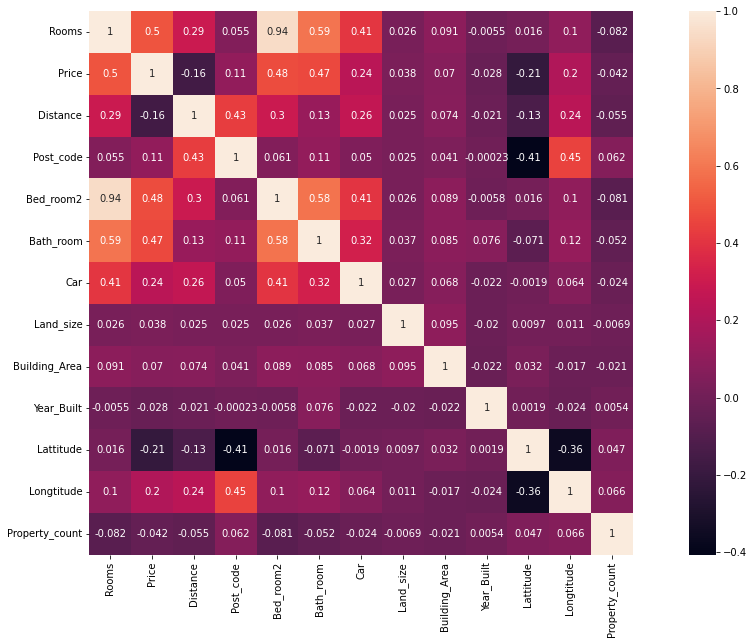

In [20]:
#Mapa de calor correlacion de variables 

df_corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, square=True, annot = True)

<p><a name="Corrp"></a></p>

### Correlaciones Positivas 

In [21]:

df[["Price", "Rooms"]].corr()


,Price,Rooms
Price,1.000000,0.496634
Rooms,0.496634,1.000000


In [22]:
df[["Price", "Bed_room2"]].corr()

,Price,Bed_room2
Price,1.000000,0.475951
Bed_room2,0.475951,1.000000


In [23]:
df[["Price", "Bath_room"]].corr()

,Price,Bath_room
Price,1.000000,0.467038
Bath_room,0.467038,1.000000


In [24]:
df[["Price", "Car"]].corr()

,Price,Car
Price,1.000000,0.237542
Car,0.237542,1.000000


In [25]:
df[["Price", "Longtitude"]].corr()

,Price,Longtitude
Price,1.000000,0.203656
Longtitude,0.203656,1.000000


<p><a name="Corrn"></a></p>


### Correlaciones negativas 

In [26]:
df[["Price", "Lattitude"]].corr()

,Price,Lattitude
Price,1.000000,-0.212934
Lattitude,-0.212934,1.000000


In [27]:
df[["Price", "Distance"]].corr()

,Price,Distance
Price,1.000000,-0.162522
Distance,-0.162522,1.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Suburb          13580 non-null  object 
 1   Address         13580 non-null  object 
 2   Rooms           13580 non-null  int64  
 3   Type            13580 non-null  object 
 4   Price           13580 non-null  int64  
 5   Method          13580 non-null  object 
 6   Seller_G        13580 non-null  object 
 7   Date            13580 non-null  object 
 8   Distance        13580 non-null  float64
 9   Post_code       13580 non-null  float64
 10  Bed_room2       13580 non-null  int64  
 11  Bath_room       13580 non-null  int64  
 12  Car             13580 non-null  int64  
 13  Land_size       13580 non-null  int64  
 14  Building_Area   13580 non-null  int64  
 15  Year_Built      13580 non-null  int64  
 16  Lattitude       13580 non-null  float64
 17  Longtitude      13580 non-null 

<p><a name="Selec"></a></p>


# Modelo ML 

In [29]:

from sklearn.tree import DecisionTreeRegressor

# Metricas 
from sklearn.model_selection import train_test_split

In [30]:
# Almacenar Variables seleccionadoas para el algoritmo 
Car_select =["Rooms","Bed_room2","Bath_room","Car","Longtitude","Lattitude", "Distance"]
#Almacenar la variable objetivo 
obj_select = df.Price

# Almacenar datos en variables pequeñas para manipular datos en el modelo 
X = df[Car_select]
y = obj_select

In [31]:
X_train, X_test, y_test, y_train = train_test_split(X, y, test_size = 0.20, random_state =42)

<p><a name="Mod"></a></p>


# Decisiontree_model 

In [32]:
DT_model = DecisionTreeRegressor()
DT_model.fit(X, y)

DecisionTreeRegressor()

In [33]:
print(DT_model.predict(X.head()))
print(df.Price.head())

[1480000. 1035000. 1465000.  850000. 1600000.]
0    1480000
1    1035000
2    1465000
3     850000
4    1600000
Name: Price, dtype: int64


In [34]:
DT_model.score(X,y)

0.9997476701343866